In [1]:
import sys

import IPython.display as ipd
import matplotlib.pyplot as plt

sys.path.append('..')
import utils

In [2]:
source = utils.io.init_audio(r'F:\Work2\drum-onset-detection\data\IDMT-SMT-DRUMS-V2\audio\RealDrum01_00#HH#train.wav')
audio, sr = utils.io.read_audio(source)
audio.shape

(363520,)

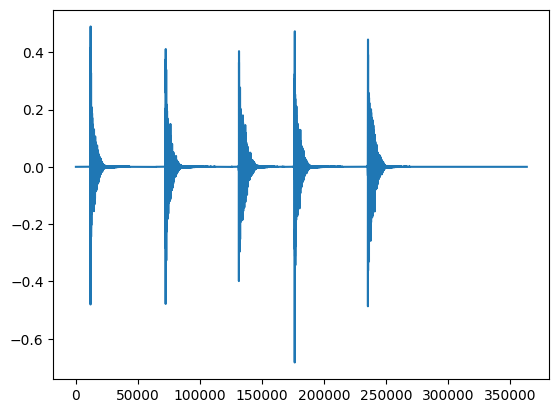

In [3]:
ipd.display(ipd.Audio(audio, rate=sr, normalize=False))
plt.plot(audio)
plt.show()